In [2]:
"""
Data Science Project
"""

import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf
from pandas.plotting import scatter_matrix


tickr_list = ['GOOG','MSFT','IBM']

# Function to return data query
def return_data_query(company_symbol,from_period,to_period,interval):
    data_query = f'https://query1.finance.yahoo.com/v7/finance/download/{company_symbol}?period1={from_period}&period2={to_period}&interval={interval}&events=history&includeAdjustedClose=true'
    return data_query

# Function to return data frame
def return_data_frame(data_query):
    data_frame = pd.read_csv(data_query)
    return data_frame


from_period =  int(time.mktime(datetime.datetime(2021,10,24,23,59,59).timetuple())) #From Period
to_period = int(time.mktime(datetime.datetime(2021,12,24,23,59,59).timetuple())) #To Period
interval = '1d' #Interval Time

google_data_frame = return_data_frame(return_data_query(tickr_list[0],from_period,to_period,interval)) #GOOGL - Google data frame
microsoft_data_frame = return_data_frame(return_data_query(tickr_list[1],from_period,to_period,interval)) #MSFT - Microsoft Data frame
ibm_data_frame = return_data_frame(return_data_query(tickr_list[2],from_period,to_period,interval)) #IBM - Microsoft Data frame

print("Statistical details of Google data frame - ")
google_data_frame.describe()

Statistical details of Google data frame - 


,Open,High,Low,Close,Adj Close,Volume
count,43.000000,43.000000,43.000000,43.000000,43.000000,4.300000e+01
mean,2924.001732,2953.004616,2893.859943,2924.652565,2924.652565,1.169328e+06
std,60.536683,54.987212,62.685383,57.351276,57.351276,3.932030e+05
min,2776.209961,2784.115967,2734.969971,2775.459961,2775.459961,6.232000e+05
25%,2886.645019,2931.276489,2843.085083,2880.169922,2880.169922,9.128500e+05
50%,2941.790039,2967.989990,2901.070068,2934.959961,2934.959961,1.062500e+06
75%,2967.754883,2992.310059,2942.055054,2973.579956,2973.579956,1.333350e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,2.592500e+06


In [3]:
print("Statistical details of Microsoft data frame")
microsoft_data_frame.describe()

Statistical details of Microsoft data frame


,Open,High,Low,Close,Adj Close,Volume
count,43.000000,43.000000,43.000000,43.000000,43.000000,4.300000e+01
mean,331.690232,334.692793,328.424651,331.887208,331.648753,2.814288e+07
std,7.676978,7.679189,8.007596,7.578531,7.628271,8.384029e+06
min,309.359985,309.399994,306.459991,308.130005,307.567322,1.672300e+07
25%,329.454987,333.075012,324.004989,328.854995,328.554260,2.208880e+07
50%,333.920013,336.390015,330.000000,333.200012,333.200012,2.629790e+07
75%,335.994995,338.755005,334.225006,336.675003,336.239853,3.102650e+07
max,344.619995,349.670013,342.200012,343.109985,343.109985,5.258870e+07


In [4]:
print("Statistical details of IBM data frame")
ibm_data_frame.describe()

Statistical details of IBM data frame


,Open,High,Low,Close,Adj Close,Volume
count,43.000000,43.000000,43.000000,43.000000,43.000000,4.300000e+01
mean,121.022180,122.222354,120.111059,121.136105,120.727260,5.847192e+06
std,3.432968,3.559858,3.439218,3.801842,3.839787,1.561756e+06
min,115.000000,116.339996,114.559998,115.809998,115.809998,3.220800e+06
25%,118.500000,119.485001,117.654999,118.479999,118.074791,4.884400e+06
50%,120.745697,121.790001,119.900002,120.630974,119.910004,5.483900e+06
75%,122.805001,124.154999,121.654999,123.340001,122.960000,6.726852e+06
max,130.000000,130.960007,129.520004,130.630005,130.630005,1.037900e+07


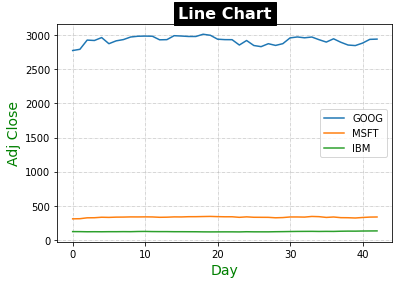

In [6]:
#Function to return grouped data frame for specifc column
def return_grouped_data_frame(column_name):
        merged_data = pd.DataFrame(columns=tickr_list) # Merged Data variable
        #Group data frame by column name
        for ticker in tickr_list:
            data_frame = return_data_frame(return_data_query(ticker,from_period,to_period,interval))
            merged_data[ticker] = data_frame[column_name]
        return merged_data     
            
#Common Function to display line chart        
def show_line_chart(merged_data,y_label,x_label,title):
    merged_data.plot(figsize=(6,4))
    merged_data.cumsum()
    plt.title(title, fontsize=16,color='white',backgroundcolor='black',fontweight='bold')
    plt.ylabel(y_label,fontsize=14,color='green')
    plt.xlabel(x_label,fontsize=14,color='green')
    plt.grid(visible=None,which="both",linestyle='-.',linewidth=0.5)
    plt.show()
     
        
# Display Line chart for certain period's Adjusted Close
show_line_chart(return_grouped_data_frame('Adj Close'),'Adj Close','Day',"Line Chart")    

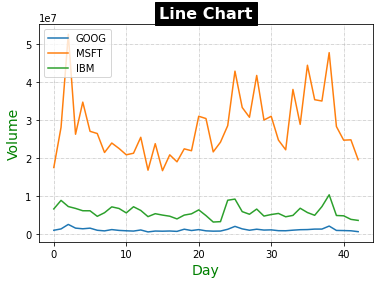

In [7]:
# Display Line chart for certain period's Volume
show_line_chart(return_grouped_data_frame('Volume'),'Volume','Day','Line Chart')    

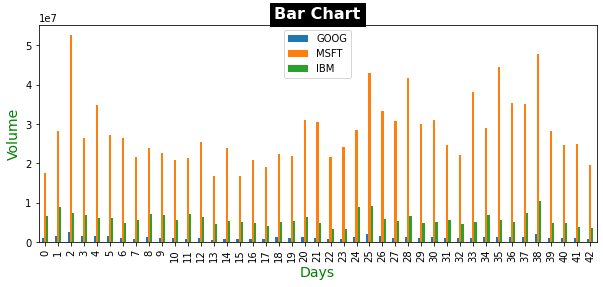

In [7]:
def show_bar_chart(merged_data,title,y_label,x_label):
    merged_data.plot.bar(figsize=(10,4))
    plt.title(title, fontsize=16,color='white',backgroundcolor='black',fontweight='bold')
    plt.ylabel(y_label,fontsize=14,color='green')
    plt.xlabel(x_label,fontsize=14,color='green')
    
show_bar_chart(return_grouped_data_frame('Volume'),'Bar Chart','Volume','Days')

<Figure size 432x288 with 0 Axes>

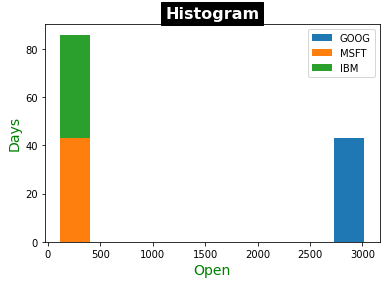

In [8]:
def show_histogram(merged_data,title,y_label,x_label):
        plt.figure()
        merged_data.plot.hist(figsize=(6,4),stacked=True,histtype='bar');
        plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='bold')
        plt.ylabel(y_label,fontsize=14,color='green')
        plt.xlabel(x_label,fontsize=14,color='green')

show_histogram(return_grouped_data_frame('Open'),"Histogram","Days","Open")        

<Figure size 432x288 with 0 Axes>

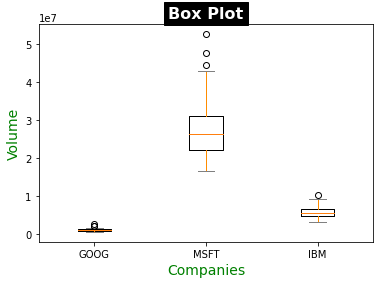

In [9]:
def show_boxplot(merged_data,title,y_label,x_label):
    plt.figure()
    merged_data.plot.box(vert=True,color={"boxes": "DarkGreen","whiskers": "DarkOrange","medians": "DarkBlue","caps": "Gray"},showfliers=True,boxprops={"linestyle":"-","linewidth":"1"},medianprops={"linestyle":"-","linewidth":"1"})
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='bold')
    plt.ylabel(y_label,fontsize=14,color='green')
    plt.xlabel(x_label,fontsize=14,color='green')
    
show_boxplot(return_grouped_data_frame('Volume'),"Box Plot","Volume","Companies")    

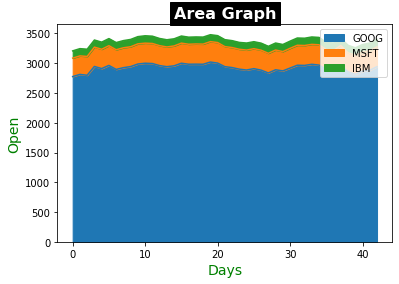

In [10]:
def show_area_chart(merged_data,title,y_label,x_label):
    merged_data.plot.area()
    plt.legend(loc='upper right')
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='bold')
    plt.ylabel(y_label,fontsize=14,color='green')
    plt.xlabel(x_label,fontsize=14,color='green')
    
show_area_chart(return_grouped_data_frame('Open'),"Area Graph","Open","Days")        

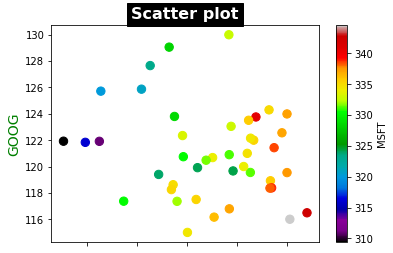

In [11]:
def show_scatter_plot(merged_data,x_axes,y_axes,title):
    merged_data.plot.scatter(figsize=(6,4),x=x_axes,y=y_axes,c="MSFT",cmap="nipy_spectral", s=70)
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='bold')
    plt.ylabel(x_axes,fontsize=14,color='green')
    plt.xlabel(y_axes,fontsize=14,color='green')
    plt.show()
    
show_scatter_plot(return_grouped_data_frame('Open'),"GOOG","IBM","Scatter plot")    

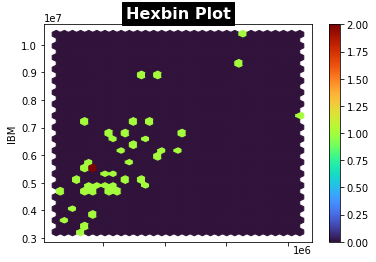

In [23]:
def show_hexbin_plot(merged_data,x_axes,y_axes,title):
    merged_data.plot.hexbin(x=x_axes,y=y_axes,reduce_C_function=np.max,gridsize=30,cmap="turbo");
    plt.title(title,fontsize=16,color='white',backgroundcolor='black',fontweight='bold')
    plt.show()
show_hexbin_plot(return_grouped_data_frame('Volume'),"GOOG","IBM","Hexbin Plot")

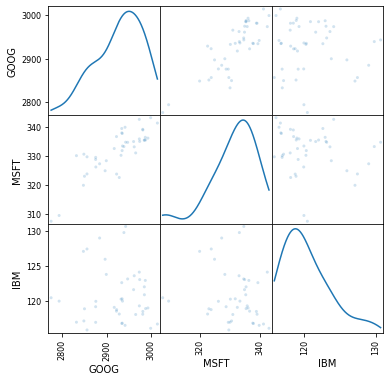

In [51]:
def show_desnity_plot(merged_data):
    scatter_matrix(merged_data,alpha=0.2,figsize=(6, 6),diagonal="kde");
show_desnity_plot(return_grouped_data_frame('Adj Close'))    

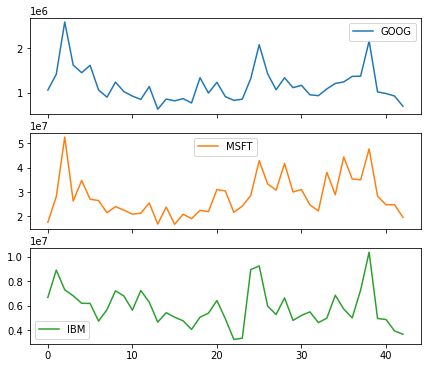

In [10]:
#Function to display sub plots for merged data
def show_subplots(merged_data,chart_type):
    merged_data.plot(subplots=True, figsize=(7,6),kind=chart_type);
    
show_subplots(return_grouped_data_frame('Volume'),'line')

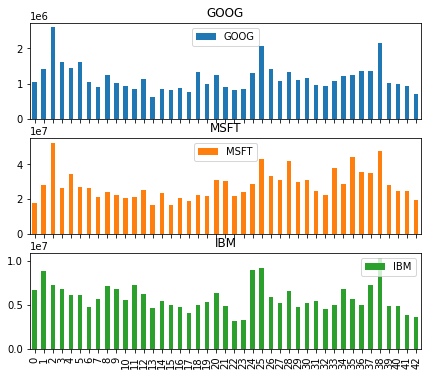

In [11]:
show_subplots(return_grouped_data_frame('Volume'),'bar')

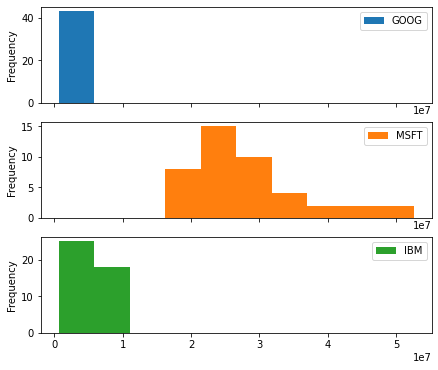

In [13]:
show_subplots(return_grouped_data_frame('Volume'),'hist')

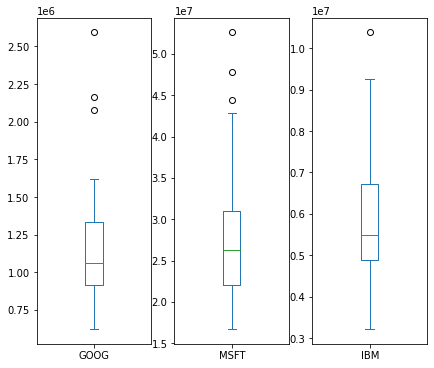

In [14]:
show_subplots(return_grouped_data_frame('Volume'),'box')

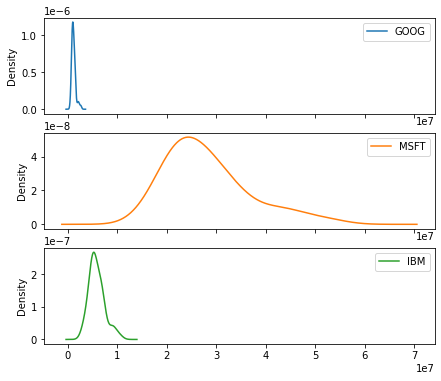

In [15]:
show_subplots(return_grouped_data_frame('Volume'),'kde')

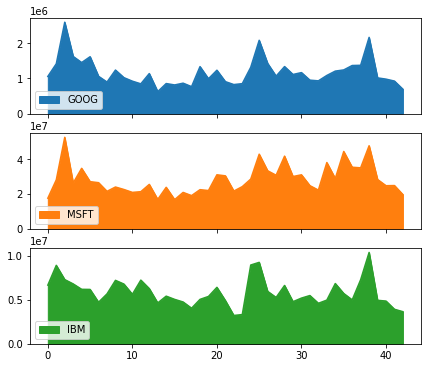

In [17]:
show_subplots(return_grouped_data_frame('Volume'),'area')